# Tarea 1
### Modelos no paramétricos y de regresión

##### Por: Alberto Olvera Trejo

In [20]:
import numpy as np
from scipy.stats import binom
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import chi2
from scipy.stats import anderson
from scipy.stats import t
from scipy.stats import chi2_contingency
# !pip install import-ipynb
import import_ipynb

from TestEquality import *

### Ejercicio 1

El porcentaje del contenido de agua en tierras de cultivo varía ligeramente en áreas grandes y estas variaciones pueden asociarse a aspectos relacionados con la calidad del drenaje. Se toman dos muestras de $10$ cuadrantes cada una del porcentaje de agua en el terreno, y una  muestra en otros 10. Se desea sostener la hipótesis de una mediana de $9$ con un nivel de error del $5\%$.
- Realiza la prueba con una sola muestra y luego con ambas. Discute tus resultados.
- Construye un intervalo del $95\%$ de confianza para la mediana considerando ambas muestras.

| Muestra 1  | Muestra 2 |
|------------|-----------|
|     5.5    |    5.6    |
|     6.0    |    6.1    |
|     6.5    |    6.3    |
|     7.6    |    6.3    |
|     7.6    |    6.5    |
|     7.7    |    6.6    |
|     8.0    |    7.0    |
|     8.2    |    7.5    |
|     9.1    |    7.9    |
|     15.1   |    8.0    |
|            |    8.0    |
|            |    8.1    |
|            |    8.1    |
|            |    8.3    |
|            |    8.4    |
|            |    8.5    |
|            |    8.7    |
|            |    9.4    |
|            |    14.3   |
|            |    26.0   |


##### a) Prueba con una sola muestra

In [21]:
alfa = 0.05
mediana_0 = 9

#guardamos los datos en un vector y eliminamos los repetidos
X_1 = np.array([5.5, 6.0, 6.5, 7.6, 7.6, 7.7, 8.0, 8.2, 9.1, 15.1])
X_1 = np.unique(X_1)

#Calculamos la K observada, es decir, los signos positivos
K_obs = len(X_1[X_1 > mediana_0])

#Calculamos la region de rechazo
proba = 0
k_1 = 1
k_2 = len(X_1) + 1
n = len(X_1)
p = 1/2

while proba <= alfa and (k_1 <= k_2):
  k_1 += 1
  k_2 -= 1

  #calculamos las probas de ambas colas
  p1 = binom.cdf(k_1, n, p)
  p2 = 1 - binom.cdf(k_2, n, p, loc = 0)

  proba = p1 + p2
  print(proba)

k_1 -= 1
k_2 += 1

print(f'Rechazar H_0 si K_obs <= {k_1} o si K_obs >= {k_2}')
print(f'K_obs = {K_obs}')

0.08984375
Rechazar H_0 si K_obs <= 1 o si K_obs >= 10
K_obs = 2


In [22]:
binom.pmf(3, 10, 1/2)

0.1171875

En este caso no rechazamos H_0, por lo que hay evidencia estadística de que la mediana de la muestra es $9$


Ahora realizamos la prueba con las dos muestras

In [23]:
X_2 = np.array([5.6, 6.1, 6.3, 6.3, 6.5, 6.6, 7.0, 7.5, 7.9, 8.0, 8.0, 8.1, 8.1, 8.3, 8.4, 8.5, 8.7, 9.4, 14.3, 26.0])
X_2 = np.unique(X_2)

X = np.concatenate((X_1, X_2), axis = 0)

K_obs = len(X[X > mediana_0])

#Calculamos la region de rechazo
proba = 0
k_1 = 1
k_2 = len(X) + 1
n = len(X)
p = 1/2

while proba <= alfa and (k_1 <= k_2):
  k_1 += 1
  k_2 -= 1

  #calculamos las probas de ambas colas
  p1 = binom.cdf(k_1, n, p, loc = 0)
  p2 = 1 - binom.cdf(k_2, n, p, loc = 0)

  proba = p1 + p2
  print(proba)

k_1 -= 1
k_2 += 1

print()
print(f'****Rechazar H_0 si K_obs <= {k_1} o si K_obs >= {k_2}')
print(f'K_obs = {K_obs}')

5.245208740234375e-06
4.400312900543213e-05
0.00026716291904449463
0.001252204179763794
0.004721641540527344
0.014746397733688354
0.039006307721138
0.08899642527103424

****Rechazar H_0 si K_obs <= 8 o si K_obs >= 20
K_obs = 5


En este caso sí rechazamo H0, por lo que concluimos que hay evidencia estadística de que la mediana de la muestra no es $9$

##### b) Intervalo de confianza para ambas muestras

Sabemos que el intervalo de $(1 - \alpha)100\%$ de confianza para el cuantil $p$ es:
$$[X_{(r)}, X_{(s)}]$$
donde $\kappa_p$ es el cuantil $p$, es decir $\mathbb{P}[X < \kappa_p] = p$

Luego, usando la región de rechazo se sigue que:
$$\mathbb{P}[k_1 + 1 \leq K \leq k_2 - 1 ] = 1 - \alpha$$

Lo anterior sucede si y sólo si:
$$\mathbb{P}[X_{(k_1 + 1)} \leq K \leq X_{(k_2 - 1)} ] = 1 - \alpha$$

Entonces el intervalo de $(1 - \alpha)100\%$ de confianza para la media está dado por:
$$[X_{(k_1 + 1)}, X_{(k_2 - 1)} ]$$

Usaremos que cuando $n \to \infty$, entonces la distribución binomial se aproxima a la normal para así poder encontrar las constantes $k_1, k_2$. Vamos a sumar $0.5$ para considerar la corrección de continuidad.

Sea $z_{\alpha/2}$ el cuantil $1 - \alpha/2$ de una normal estandar, entonces:

$$\frac{k_2 - 0.5 - 0.5*n }{0.5\sqrt{n}} = z_{\alpha/2} \hspace{4em} \frac{k_1 + 0.5 - 0.5*n }{0.5\sqrt{n}} = -z_{\alpha/2}$$

Despejando:
$$k_2 = 0.5*n + 0.5 + 0.5*z_{\alpha/2}*\sqrt{n} = s$$
$$k_1 + 1 = 0.5*n + 0.5 - 0.5*z_{\alpha/2}*\sqrt{n} = r$$


In [24]:
X = np.array([5.5, 6.0, 6.5, 7.6, 7.6, 7.7, 8.0, 8.2, 9.1, 15.1, 5.6, 6.1,
              6.3, 6.3, 6.5, 6.6, 7.0, 7.5, 7.9, 8.0, 8.0, 8.1, 8.1, 8.3, 
              8.4, 8.5, 8.7, 9.4, 14.3, 26.0])

z_alpha2 = stats.norm.ppf(1 - alfa/2)
n = len(X)

s = 0.5*n + 0.5 + 0.5*z_alpha2*np.sqrt(n)
r = 0.5*n + 0.5 - 0.5*z_alpha2*np.sqrt(n)

print(f'El intervalo del 95% de confianza para la media es:')
print(f'[{r}, {s}]') 

El intervalo del 95% de confianza para la media es:
[10.132417568848528, 20.867582431151472]


### Ejercicio 2

I. Geffen, Bradshaw and Nettleton (1973) querían saber si ciertos números presentados de manera aleatoria se percivían más rápidamente por el campo visual del ojo derecho (RVF) o por el izquierdo (LVF), o si no había una
diferencia consistente. A cada uno de $12$ sujetos se les midio el tiempo medio de respuesta a informacion digital  ́
en los dos campos visuales (medidos en microsegundos).
¿Hay evidencia en los datos que apoye una diferecia en la respuesta?

| RVF | LVF |
|-----|-----|
| 564 | 557 |
| 521 | 505 |
| 495 | 465 |
| 564 | 562 |
| 560 | 544 |
| 481 | 448 |
| 545 | 531 |
| 478 | 458 |
| 580 | 560 |
| 484 | 485 |
| 539 | 520 |
| 467 | 445 |


(array([2., 2., 0., 1., 0., 1., 1., 1., 1., 3.]),
 array([445. , 456.7, 468.4, 480.1, 491.8, 503.5, 515.2, 526.9, 538.6,
        550.3, 562. ]),
 <BarContainer object of 10 artists>)

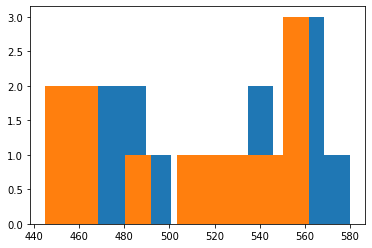

In [25]:
#Definimos los arreglos
x = np.array([564, 521, 495, 564, 560, 481, 545, 478, 580, 484, 539, 467])
y = np.array([557, 505, 465, 562, 544, 448, 531, 458, 560, 485, 520, 445])

plt.hist(x)
plt.hist(y)

In [26]:
#usamos las funciones creadas en el archivo TestEquality.ipynb
mw = MannWhitneyTest(x, y)
mw.run_test(alternative = 'F_Y != F_X')

H_0: F_X = F_Y v.s H_a: F_X != F_Y
Rechazar H_0: F_X = F_Y si: Z <= -1.960 o Z >= 1.960
Valor que tomó la estadística U: U_obs = 78
Valor que tomó la estadística Z: Z_obs = 0.348
Valor que tomó la estadística U': U'_obs = 43
Valor que tomó la estadística Z': Z'_obs = -0.329
-> No rechazamos H_0 con nivel de significancia 5.0%


In [27]:
wt = WilcoxonTest(x, y)
wt.run_test(alternative = 'F_Y != F_X')

H_0: F_X = F_Y v.s H_a: F_X != F_Y
Rechazar H_0: F_X = F_Y si: Z <= -1.960 o Z >= 1.960
Valor que tomó la estadística W: W_obs = 144
Valor que tomó la estadística Z: Z_obs = 1.182
->No rechazamos H_0 con nivel de significancia 5.0%


Tando con la prueba U como con la de Wilcoxon no rechazamos H0, por lo que hay evidencia estadística para afirmar que no hay diferencia en la respueta visual

### Ejercicio 3

Una psicóloga quiere saber si las mujeres se molestan más que los hombres cuando hay restrasos en su admisión al hospital para someterse a una cirugía de rutina. Se desarrolla un índice de ansiedad y se mide a los pacientes una
semana antes de la admision programada; este se mide a $17$ hombres y a $23$ mujeres. 
El índice oscila entre $1$ y $40$ en una escala de incremento de ansiedad. La suma de rangos de los $17$ hombres es $428$. ¿Hay evidenica en los datos de que la ansiedad dependa del sexo? Si la hay, ¿que género biológico presenta más ansiedad?  ́

In [28]:
#sabemos que W_obs = 428
W_obs = 428

#usamos la aproximacion asintotica con correcion de continuidad
n1 = 17
n2 = 23
n = n1 + n2

z = W_obs + 0.5 - (n1*(n + 1)/2)
z /= np.sqrt(n1*n2*(n + 1)/12)

#usaremos una significancia del 5%
alfa = 0.05

#hacemos la prueba con la hipotesis alternativa de que F_X < F_Y
# es decir, los hombres tienen menos ansiedad
c_alpha = norm.ppf(q = alfa)
print("H_0: F_X = F_Y v.s H_a: F_X < F_Y")
print(f"Rechazar H_0: F_X = F_Y si: Z >= {c_alpha:.3f}")
print(f"Valor que tomó la estadística W: W_obs = {z}")
print(f"Valor que tomó la estadística Z: Z_obs = {z:.3f}")
decision = "-> Rechazamos H_0" if z >= c_alpha else "->No rechazamos H_0"
print(decision + f" con nivel de significancia {alfa*100}%")      



H_0: F_X = F_Y v.s H_a: F_X < F_Y
Rechazar H_0: F_X = F_Y si: Z >= -1.645
Valor que tomó la estadística W: W_obs = 2.188770884287842
Valor que tomó la estadística Z: Z_obs = 2.189
-> Rechazamos H_0 con nivel de significancia 5.0%


Hay evidencia estadística de que, según el indice de ansiedad desarrollado, los hombres sufren de menos ansiedad

### Ejercicio 4

Un modelo genético sugiere que las probabilidades de un evento trinomial son
$$
\begin{align*}
    \theta_1 &= p^{2} \\
    \theta_2 &= 2p(1-p) \\
    \theta_3 &= (1-p)^{2}
\end{align*}
$$
con $0<p<1$.

Asume que $X_1, X_2$ y $X_3$ representan las frecuencias observadas a cada categoría en una muestra de $n$ ensayos independientes, respectivamente. Obtén una prueba de bondad de ajuste de tipo $\chi ^{2}$ para esta distribución trinomial si $p$ es desconocida.


### Solución 

Tenemos dos casos, cuando el valor de $p$ está dado y cuando no lo está. El caso facil es cuando $p$ está dado, pues basta con calcular el valor observado de la $\chi^2$.
Como tenemos las probabilidades del eventro trinomial y las frecuencias observadas, entonces $e_i = n*\theta_i$ por lo que:
$$\chi^2 = \frac{(X_1 - np^2)^2}{np^2} + \frac{(X_2 - n2p(1-p))^2}{n2p(1-p)} + \frac{(X_3 - n(1-p)^2)^2}{n(1-p)^2}$$

Rechazamos $H_0$ en caso de que $\chi^2 > C_{\alpha}$, con $C_{\alpha}$ el cuantil $1 - \alpha$ de una $\chi^2_{2}$, pues como tenemos tres categorias, entonces al fijar dos,sabemos cual es la proba de la tercera.


Ahora consideremos el caso cuando $p$ no está dada. La estrategia a seguir es buscar un estimador para el parámetro $p$, es decir, buscamos $\hat{p}$ para de esa manera sustituir $\hat{p}$ en la formula de arriba y así calcular el valor $\chi^2_{obs}$. Notemos que bajo $H_0$ tenemos que:
$$X_1 \approx np^2 \hspace{3em} X_2 \approx n2p(1-p) = 2np - 2np^2$$

Multiplicando $X_1$ por dos y sumandolo X_2 obtenemos:
$$2X_1 + X_2 \approx 2np^2 + 2np - 2np^2 = 2np$$
Luego, tenemos que forzosamente $X_1 + X_2 + X_3 = n$, por lo que:
$$2X_1 + X_2 \sim 2np = 2p(X_1 + X_2 + X_3)$$

Despejando $p$ obtenemos que:
$$\hat{p} = \frac{2X_1 + X_2}{2(X_1 + X_2 + X_3)}$$
Por lo tanto, ya hemos encontrar un estimador para $p$ y calculamos $\chi^2_{obs}$ como sigue:
$$\chi^2_{obs} = \frac{(X_1 - n\hat{p}^2)^2}{n\hat{p}^2} + \frac{(X_2 - n2\hat{p}(1-\hat{p}))^2}{n2\hat{p}(1-\hat{p})} + \frac{(X_3 - n(1-\hat{p})^2)^2}{n(1-\hat{p})^2}$$
Y seguimos la misma regla de decisión (es decir, la misma región crítica) que tomamos cuando $p$ ya estaba dada.

### Ejercicio 5

La tabla muestra el número de espectáculos de debutaron en Broadway durante 1998. Pruebe la hipótesis de que el número de espectáculos que abren por mes sigue una distribución Poisson. ¿Cómo podrías explicar el patrón de comportamiento observado tomando en cuenta los patrones de turismo?

|   Mes   | Número de show |    Mes     | Número de show |
|:-------:|:--------------:|:----------:|:--------------:|
|  Enero  |        6       | Julio      |        2       |
| Febrero |        3       | Agosto     |        2       |
|  Marzo  |       15       | Septiembre |        2       |
|  Abril  |       28       | Octubre    |        8       |
|  Mayo   |        1       | Noviembre  |       15       |
|  Junio  |        2       | Diciembre  |       17       |


In [29]:
x = np.array([6, 3, 15, 28, 1, 2, 2, 2, 2, 8, 15, 17])

#opcional: colapsamos las categorias menores a 5

x = np.array([9, 15, 37, 8, 15, 17])

n = sum(x)

#calculamo el valor de lambda
lamb = np.array([i*x[i] for i in range(len(x))])
lamb = sum(lamb)/n

#calculamos los valores esperados
e = n*poisson.pmf([i for i in range(len(x))], lamb, loc = 0)

#calculamos el valor observado
chi_obs = sum(((x-e)**2)/e)
print(chi_obs)

29.057975287297992


In [30]:
#calculamos la region de rachazo recordando que:
#rechazamos si Chi_obs > C_alpha

c_alpha = chi2.ppf(0.95, len(x) - 1, loc=0, scale=1)
print(c_alpha)

11.070497693516351


Como $\chi_{obs} = 29.05$ y $C_{\alpha} = 11.07$, entonces $\chi_{obs} > C_{\alpha}$, por lo que rechazamos $H_0$.

Así, concluimos que la muestra no tiene distribución Poisson

### Ejercicio 6

La oficina de correos quiere determinar si hay una relación entre el peso en kilogramos de la correspondencia de un día y el número de empleados que se requiere para procesarla. ¿Que concluirías dada la siguiente tabla?


| Peso | Empleados |
|:----:|:---------:|
|  13  |     14    |
|  10  |      8    |
|   7  |      5    |
|  12  |      9    |
|  14  |     10    |
|  9.5 |      6    |
| 15.5 |     13    |
| 16.5 |      6    |


### Solución 
Primero vamos a ploter los datos para ver si existe la posibilidad de que las variables esten relacionadas, en particularmente, si hay relacion lineal.

[]

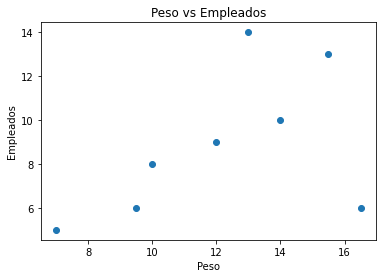

In [31]:
peso = [13, 10, 7, 12, 14, 9.5, 15.5, 16.5]
empleados = [14, 8, 5, 9, 10, 6, 13, 6]

plt.scatter(peso, empleados)
plt.xlabel('Peso')
plt.ylabel('Empleados')
plt.title('Peso vs Empleados')
plt.plot()

A primera vista se ve que sí podria haber relacion lineal. Para poder descartar la hipótesis de la independencia vamos a usar la prueba de la independecia de variables categóricas.

Dado que nuestras variables no son categoricas, entonces las vamos a transformar. Tomemos primero la variable de los Pesos y vamos a ordenarla.

$$[7, 9.5, 10, 12, 13, 14, 15.5, 16.5]$$

Notamos que la varaible toma valores de $7$ al $16.5$, entonces vamos a particionar dicho intervalo en tres partes, la primera va a ser $[7, 10]$, la segunda $[11, 15]$ y la última $[15.5, 16]$
Entonces vamos a contabilizar el número de observaciones en cada intervalo, por lo que de esta manera ya tendriamos una variable categórica.

Haciendo lo análogo para la variable Empleados. Al ordenarla obtenemos:
$$[5, 6, 6, 8, 9, 10, 13, 14]$$

Vamos a partir el intervalo $[5, 14]$ en otros tres intervalos, los cuales son: $[5, 8]$, $[9, 12]$ y $[13, 15]$

Dado que ya tenemos dos variables aleatorias, entonces podemos construir una tabla de contingencia, la cual es:

<table>
  <tr>
    <td>Peso/Empleados</td>
    <td>[5, 8]</td>
    <td>[9, 12]</td>
    <td>[13, 15]</td>
  </tr>
  <tr>
    <td>[7, 10]</td>
    <td>3</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>[11, 15]</td>
    <td>0</td>
    <td>2</td>
    <td>1</td>
  </tr>
  <tr>
    <td>[15.5, 16]</td>
    <td>1</td>
    <td>0</td>
    <td>1</td>
  </tr>
</table>

Ahora procedemos a hacer la prueba de independecia de varaibles categóricas.

In [32]:
A = np.array([ [3, 0, 0], [0, 2, 1], [1, 0, 1] ])
B = A.copy()

#agragamos las marginales
fila = np.array([sum(A[:, i]) for i in range(3)]).reshape(1, 3)

columna = [sum(A[i, :]) for i in range(3)]
columna.append(sum(columna))
columna = np.array(columna).reshape(4, 1)

A = np.concatenate((A, fila), axis = 0)
A = np.concatenate((A, columna), axis = 1)

#calculamos los valores e_ij
E = np.zeros((3, 3))
n = A[3, 3]

for i in range(3):
    for j in range(3):
        E[i, j] = A[i, -1]*A[-1, j]/n

print(A)
print()
print(E)

[[3 0 0 3]
 [0 2 1 3]
 [1 0 1 2]
 [4 2 2 8]]

[[1.5  0.75 0.75]
 [1.5  0.75 0.75]
 [1.   0.5  0.5 ]]


In [33]:
#Calculamos el valor observado
chi_obs = 0

for i in range(3):
    for j in range(3):
        sumando = ((A[i, j] - E[i, j])**2)/E[i, j]
        chi_obs += sumando

#Recodamos que rechazamos H0 si Chi_obs > C_alpha, donde
# C_alpha es el cuantil 1-alpha de la Chi

alpha = 0.05
c_alpha = chi2.ppf(0.90, df = 4, loc=0, scale=1)

print(f'Chi_obs = {chi_obs}')
print(f'C_alpha = {c_alpha}')

Chi_obs = 7.666666666666667
C_alpha = 7.779440339734858


Si tomamos $\alpha = 0.9$, entonces notamos que si bien $C_{\alpha} < \Chi_{obs}$, la diferencia entre ambos valores es demasiado chica, por lo que estamos muy cerca de entrar a la región crítica. Para poder tomar una mejor decisión, vamos a calcular las medidas de asociación.

In [34]:
#calculamos las medidas de asociacion 
coef_contin = np.sqrt((chi_obs**2)/(chi_obs**2 + 1))

T = np.sqrt((chi_obs**2)/(2*2))

V = np.sqrt((chi_obs**2)/(min(2, 2)))

print(f'Coeficiente de continencia de Pearson = {coef_contin}')
print(f'Coeficiente T = {T}')
print(f'Coeficiente de Cramer = {V}')

Coeficiente de continencia de Pearson = 0.9916004111862218
Coeficiente T = 3.8333333333333335
Coeficiente de Cramer = 5.421151989096865


Notamos que el coeficiente de Pearson es muy cercano a 1, por lo que con esta información concluimos que ambas variables están relacionadas

### Ejercicio 7

En una muestra nacional de una encuesta realizada por la Secretaría de Educacion Pública y Desarrollo Social, se obtuvo la informacion sobre algunas características de los hogares en Mexico. ¿Existe alguna relación entre las variables escolaridad alcanzada por el jefe de hogar y el tipo de piso en la casa? En caso de existir, ¿qué tan fuerte es la asociacion?

<table>
  <tr>
    <td>&nbsp;</td>
    <td>Primaria incompleta</td>
    <td>Primaria completa</td>
    <td>Secundaria completa</td>
    <td>Más de secundaria</td>
  </tr>
  <tr>
    <td>Piso de tierra</td>
    <td>278</td>
    <td>625</td>
    <td>376</td>
    <td>258</td>
  </tr>
  <tr>
    <td>Piso de cemento</td>
    <td>488</td>
    <td>1443</td>
    <td>1405</td>
    <td>2802</td>
  </tr>
  <tr>
    <td>Piso de mosaico</td>
    <td>47</td>
    <td>235</td>
    <td>405</td>
    <td>1448</td>
  </tr>
</table>


In [35]:
#cargamos los datos de la matriz
A = np.array([ [278, 625, 367, 258], [488, 1443, 1405, 2802], [47, 235, 405, 1448] ])
B = A.copy()

#agragamos las marginales
fila = np.array([sum(A[:, i]) for i in range(4)]).reshape(1, 4)

columna = [sum(A[i, :]) for i in range(3)]
columna.append(sum(columna))
columna = np.array(columna).reshape(4, 1)

A = np.concatenate((A, fila), axis = 0)
A = np.concatenate((A, columna), axis = 1)

#calculamos los valores e_ij
E = np.zeros((3, 4))
n = A[3, 4]

for i in range(3):
    for j in range(4):
        E[i, j] = A[i, -1]*A[-1, j]/n

print(A)
print()
print(E)

[[ 278  625  367  258 1528]
 [ 488 1443 1405 2802 6138]
 [  47  235  405 1448 2135]
 [ 813 2303 2177 4508 9801]]

[[ 126.74869911  359.04336292  339.3996531   702.80828487]
 [ 509.15151515 1442.28282828 1363.37373737 2823.19191919]
 [ 177.09978574  501.6738088   474.22660953  981.99979594]]


In [36]:
#Calculamos el valor observado
chi_obs = 0

for i in range(3):
    for j in range(4):
        sumando = ((A[i, j] - E[i, j])**2)/E[i, j]
        chi_obs += sumando

In [37]:
#Recodamos que rechazamos H0 si Chi_obs > C_alpha, donde
# C_alpha es el cuantil 1-alpha de la Chi

alpha = 0.05
c_alpha = chi2.ppf(0.95, df = 6, loc=0, scale=1)

print(f'Chi_obs = {chi_obs}')
print(f'C_alpha = {c_alpha}')

Chi_obs = 1132.1383422674517
C_alpha = 12.591587243743977


Como $\chi_{obs} > C_{\alpha}$, entonces rechazamos H0, por lo que descartamos que las variables sean independientes 

In [38]:
#calculamos las medidas de asociacion 
coef_contin = np.sqrt((chi_obs**2)/(chi_obs**2 + 1))

T = np.sqrt((chi_obs**2)/(2*3))

V = np.sqrt((chi_obs**2)/(min(2, 3)))

print(f'Coeficiente de continencia de Pearson = {coef_contin}')
print(f'Coeficiente T = {T}')
print(f'Coeficiente de Cramer = {V}')

Coeficiente de continencia de Pearson = 0.9999996099046691
Coeficiente T = 462.193542799279
Coeficiente de Cramer = 800.5426990586117


Notamos que el coeficiente de Pearson es prácticamente 1, por lo que podemos decir que las variables están completamente asociadas

### Ejercicio 8

Simula $10$ observaciones de una distribución normal con media $2$ y varianza $4$. 
Considere las hipótesis:

$$
\begin{align*}
    H_0 : F_X(x) &\text{ es una distribución normal}\\
        &\text{v.s} \\
    H_a : F_X(x) &\text{ no es una distribución normal}
\end{align*}
$$

Considera las pruebas de Kolmogorov-Smirnov, Anderson-Darling, Shapiro-Wilks y Cramer Von Mises para probar la hipótesis. ¿Todas las pruebas coinciden en la decisión? ¿Qué concluirías con $\alpha=0.10$?


In [39]:
np.random.seed(17)

sample = np.random.normal(2, 2, 10)

#Kolmogorov-Smirnov
print('*'*50)
print(stats.kstest(sample, stats.norm.cdf))
print()

#Anderson-Darling
print('*'*50)
print(anderson(sample))
print()

#Shapiro-Wilks
print('*'*50)
print(stats.shapiro(sample))
print()

#Cramer Von Mises
print('*'*50)
print(stats.cramervonmises(sample, 'norm'))
print()


**************************************************
KstestResult(statistic=0.7695854578300151, pvalue=1.0116000410262297e-06)

**************************************************
AndersonResult(statistic=0.20164141541274994, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

**************************************************
ShapiroResult(statistic=0.9713186621665955, pvalue=0.9027949571609497)

**************************************************
CramerVonMisesResult(statistic=2.0201604354478717, pvalue=0)



Kolmogorov-Smirnov, Anderson-Darling y Cramer Von Mises arrojan un $p-value$ menor que $0.05$, por lo que concluyen que la muesra proviene de una distribución normal. Por otro lado, Shapiro-Wilks rechaza la hipótesis nula, es decir que no hay evidencia de que provengan de una normal

### Ejercicio 9

Simula $n=10$ observaciones de una distribución t-Student con $3$ grados de libertad. 
Considere las hipótesis:

$$
\begin{align*}
    H_0 : F_X(x) &\text{ es una distribución normal}\\
        &\text{v.s} \\
    H_a : F_X(x) &\text{ no es una distribución normal}
\end{align*}
$$

Considera las pruebas de Kolmogorov-Smirnov, Anderson-Darling, Shapiro-Wilks y Cramer Von Mises para probar la hipótesis. ¿Todas las pruebas coinciden en la decisión? ¿Qué concluirías con $\alpha=0.10$? Si aumentas $n$, ¿qué puedes decir sobre las pruebas? Nota: Prueba varios valores para $n$.


In [40]:
np.random.seed(17)

sample = t.rvs(df=3, size=10)

#Kolmogorov-Smirnov
print('*'*50)
print(stats.kstest(sample, stats.norm.cdf))
print()

#Anderson-Darling
print('*'*50)
print(anderson(sample))
print()

#Shapiro-Wilks
print('*'*50)
print(stats.shapiro(sample))
print()

#Cramer Von Mises
print('*'*50)
print(stats.cramervonmises(sample, 'norm'))
print()

**************************************************
KstestResult(statistic=0.21879339619662808, pvalue=0.6490628033087398)

**************************************************
AndersonResult(statistic=0.48376531878295204, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

**************************************************
ShapiroResult(statistic=0.9007436633110046, pvalue=0.2232499122619629)

**************************************************
CramerVonMisesResult(statistic=0.07044288567462252, pvalue=0.7600680970496935)



Todas las pruebas rechazaron la hipótesis nula a excepción de la estadística Anderson-Darling.

### Ejercicio 10

Repite los ejercicios 8 y 9 para muestras de tamaño $100$.

In [41]:
np.random.seed(17)

sample = np.random.normal(2, 2, 100)

#Kolmogorov-Smirnov
print('*'*50)
print(stats.kstest(sample, stats.norm.cdf))
print()

#Anderson-Darling
print('*'*50)
print(anderson(sample))
print()

#Shapiro-Wilks
print('*'*50)
print(stats.shapiro(sample))
print()

#Cramer Von Mises
print('*'*50)
print(stats.cramervonmises(sample, 'norm'))
print()


**************************************************
KstestResult(statistic=0.5831856900627493, pvalue=7.633447361061642e-33)

**************************************************
AndersonResult(statistic=0.5565631596547576, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

**************************************************
ShapiroResult(statistic=0.9805631637573242, pvalue=0.1470283567905426)

**************************************************
CramerVonMisesResult(statistic=14.509332176147337, pvalue=1.046982167629551e-09)



Al igual que con la muestra de tamaño $10$, la unica prueba que rechaza que vengan de una distribución normal es Shapiro 

In [42]:
#ahora hacemos lo analogo pero con la t-student
np.random.seed(17)

sample = t.rvs(df=3, size=100)

#Kolmogorov-Smirnov
print('*'*50)
print(stats.kstest(sample, stats.norm.cdf))
print()

#Anderson-Darling
print('*'*50)
print(anderson(sample))
print()

#Shapiro-Wilks
print('*'*50)
print(stats.shapiro(sample))
print()

#Cramer Von Mises
print('*'*50)
print(stats.cramervonmises(sample, 'norm'))
print()

**************************************************
KstestResult(statistic=0.07495617689731474, pvalue=0.6010846011324368)

**************************************************
AndersonResult(statistic=3.161830842029886, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

**************************************************
ShapiroResult(statistic=0.8497542142868042, pvalue=1.1613597195037073e-08)

**************************************************
CramerVonMisesResult(statistic=0.13872815473139488, pvalue=0.4264181630327024)



De igual manera, Anderson-Darling fue la única estadística que aceptó que sí provienen de una distribución normal